In [18]:
import pandas as pd

In [28]:
import sys
sys.path.append('../src')

In [29]:
import sys
sys.path.append('../src')  # Ensure src is in path

from data_processing import (
    load_data, data_overview, summary_stats,
    plot_numerical_distributions, plot_categorical_distributions,
    plot_correlation_matrix, missing_values_table, plot_boxplots,
)

In [12]:
df = load_data('../data/raw/data.csv')

In [3]:
data_overview(df)

Shape: (95662, 16)

Data types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

First 5 rows:
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId

In [4]:
summary_stats(df)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TransactionId,95662,95662,TransactionId_76871,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BatchId,95662,94809,BatchId_67019,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountId,95662,3633,AccountId_4841,30893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubscriptionId,95662,3627,SubscriptionId_3829,32630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerId,95662,3742,CustomerId_7343,4091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrencyCode,95662,1,UGX,95662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CountryCode,95662.0,NaN,NaN,NaN,256.0,0.0,256.0,256.0,256.0,256.0,256.0
ProviderId,95662,6,ProviderId_4,38189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductId,95662,23,ProductId_6,32635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductCategory,95662,9,financial_services,45405,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

Numerical columns: ['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']
Categorical columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime']


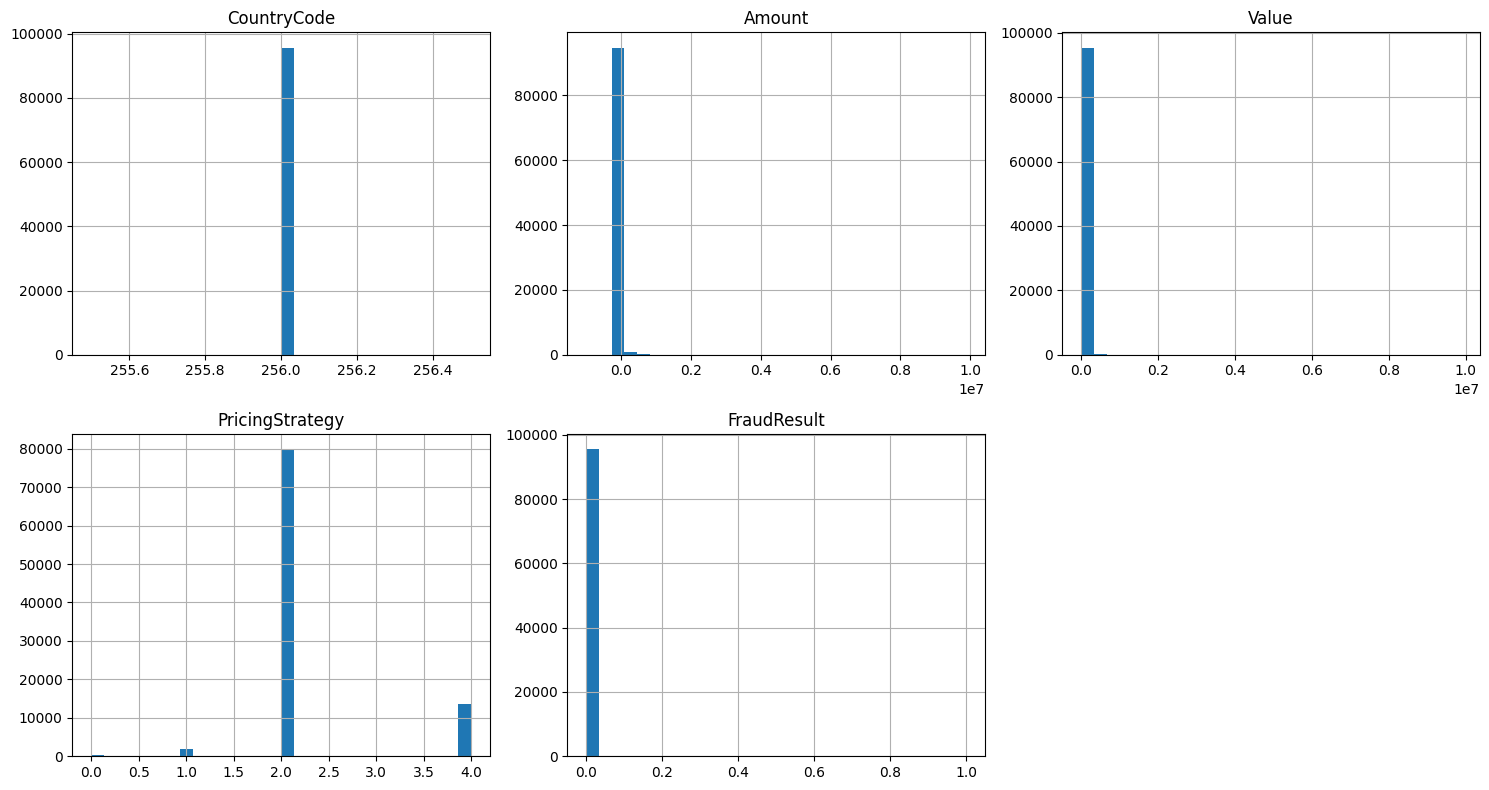

In [6]:
plot_numerical_distributions(df, num_cols)

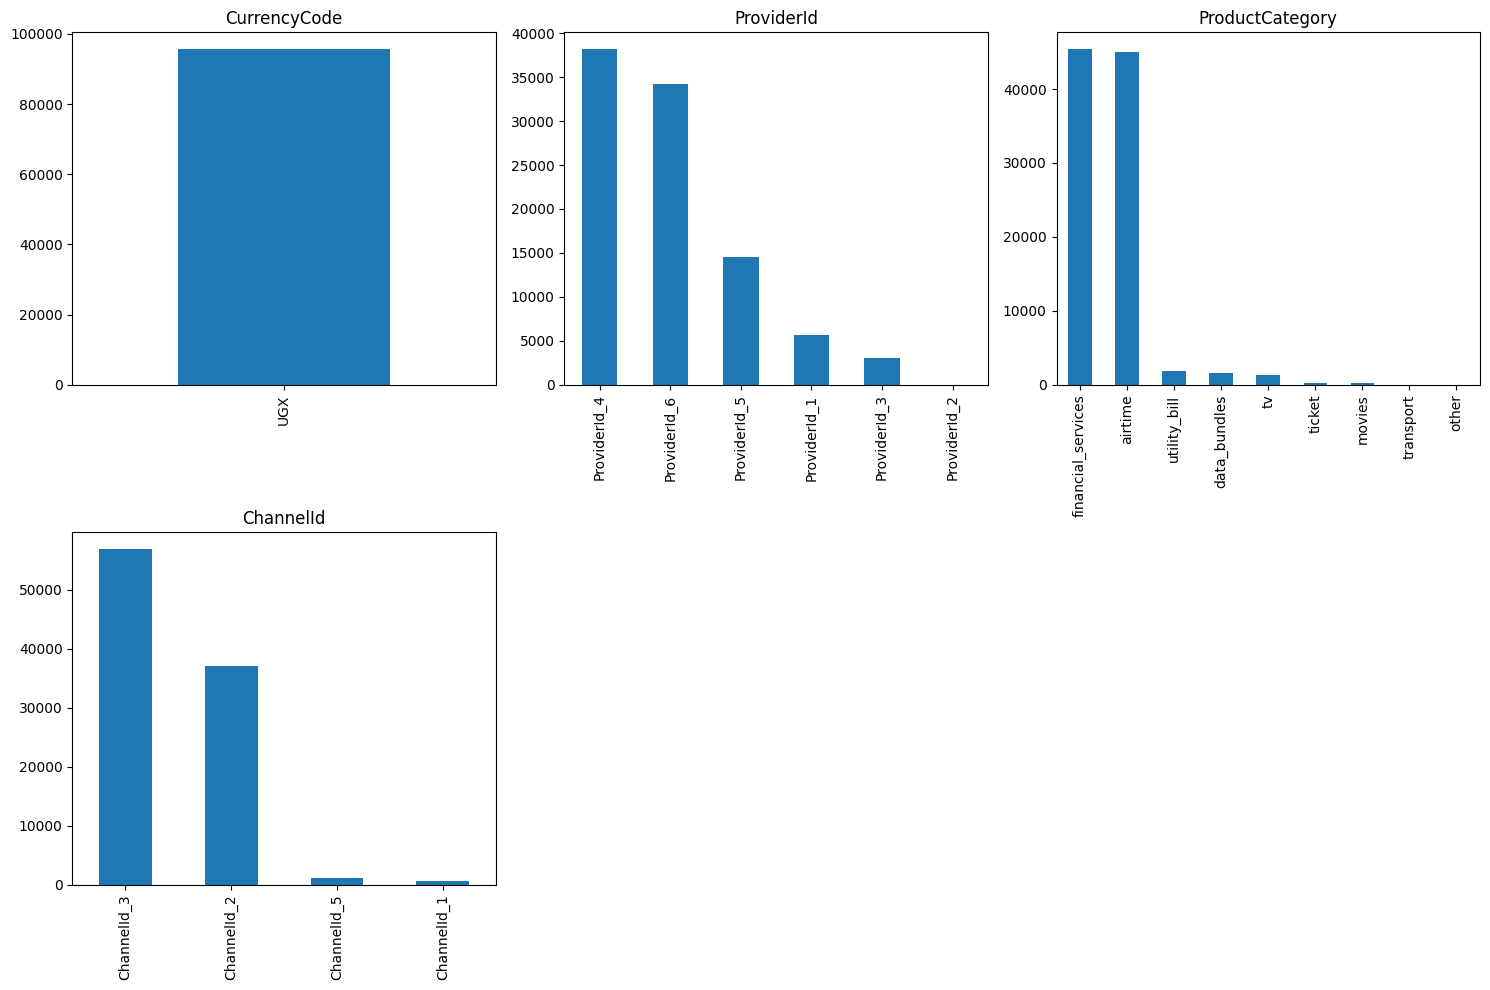

Skipped columns (too many unique values): ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'ProductId', 'TransactionStartTime']


In [13]:
plot_categorical_distributions(df, cat_cols)

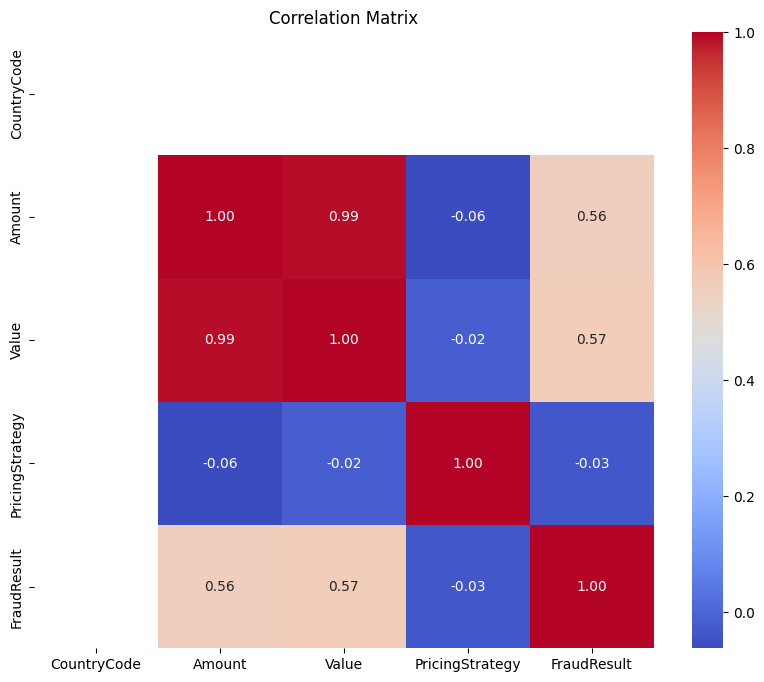

In [9]:
plot_correlation_matrix(df, num_cols)

In [17]:
missing_values_table(df)

Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


,Missing Values,% of Total Values


In [18]:
mis_val = df.isnull().sum()
mis_val_percent = 100 * mis_val / len(df)
mis_table = pd.DataFrame({
    'Missing Values': mis_val,
    '% of Total Values': mis_val_percent
})
print(mis_table)

                      Missing Values  % of Total Values
TransactionId                      0                0.0
BatchId                            0                0.0
AccountId                          0                0.0
SubscriptionId                     0                0.0
CustomerId                         0                0.0
CurrencyCode                       0                0.0
CountryCode                        0                0.0
ProviderId                         0                0.0
ProductId                          0                0.0
ProductCategory                    0                0.0
ChannelId                          0                0.0
Amount                             0                0.0
Value                              0                0.0
TransactionStartTime               0                0.0
PricingStrategy                    0                0.0
FraudResult                        0                0.0


In [19]:
mis_table = mis_table[mis_table['Missing Values'] > 0]

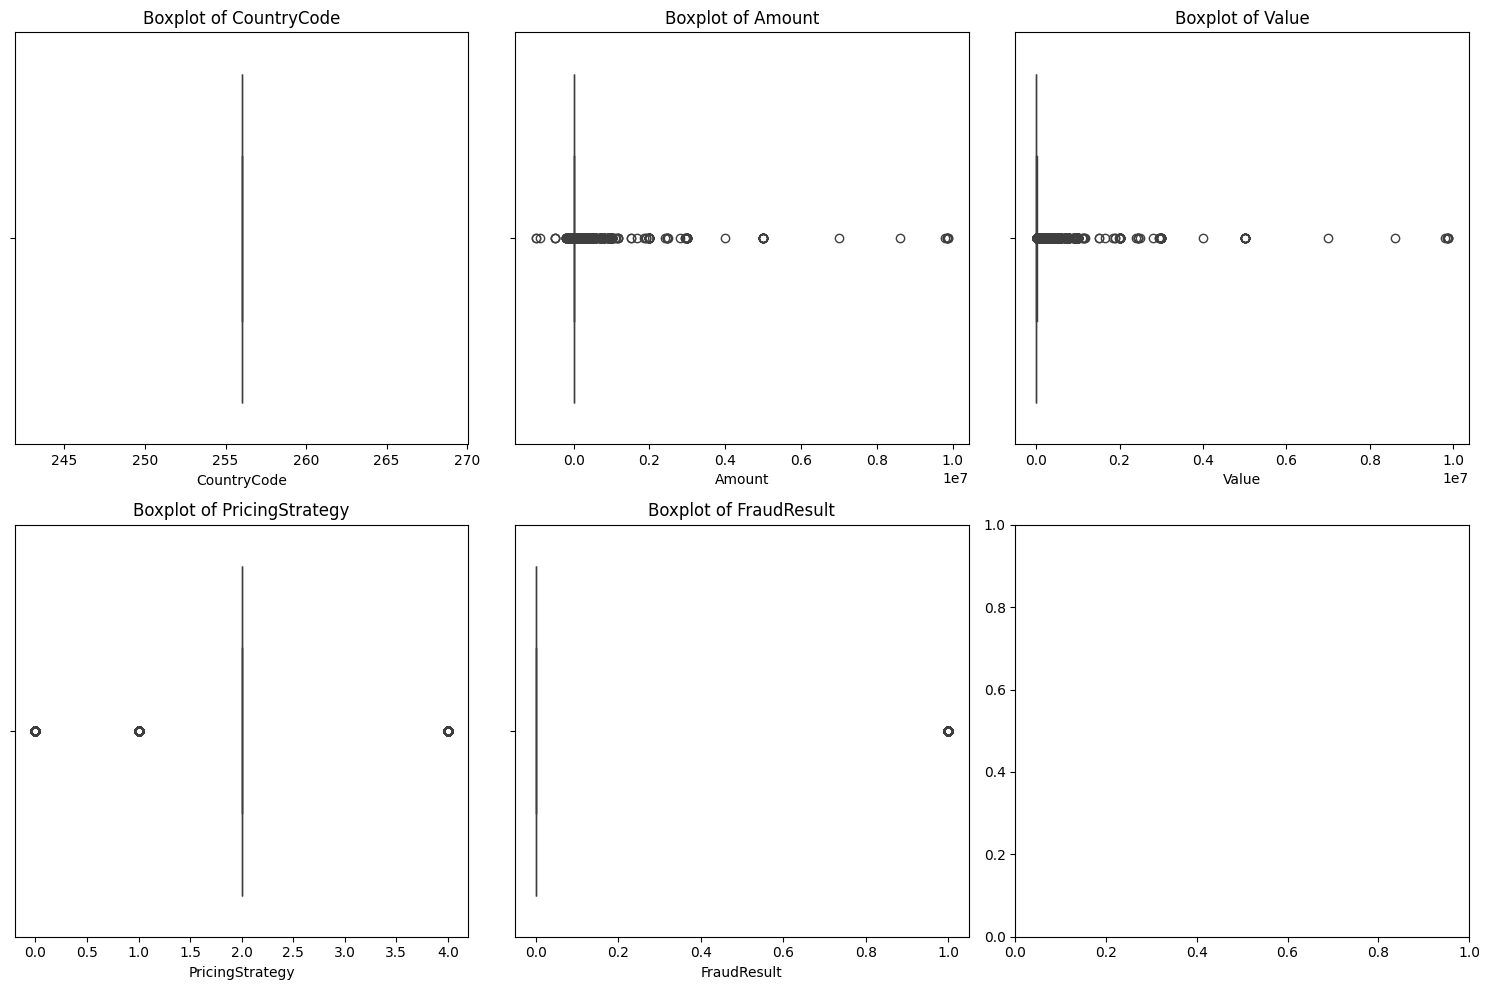

In [11]:
plot_boxplots(df, num_cols)

Task Three

In [11]:
num_cols = ['Amount', 'Value']  # Add other numerical columns as needed
cat_cols = [
    'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
    'ProductCategory', 'ChannelId', 'PricingStrategy'
]  # Add other categorical columns as needed

In [1]:
import os
import sys

# Step 1: Get the parent directory of your current working directory
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Step 2: Add project root to sys.path if not already present
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Step 3: Confirm
print("Project root added to sys.path:", project_root in sys.path)
print("src.data_processing readable:", os.path.exists(os.path.join(project_root, "src", "data_processing.py")))



Project root added to sys.path: True
src.data_processing readable: True


In [7]:
from data_processing import AggregateFeatures, load_data

In [9]:
# Instantiate the transformer
agg = AggregateFeatures(group_col='AccountId')

# Fit is a no-op, but included for completeness
agg.fit(df)

# Transform the data
df_with_agg = agg.transform(df)

# Show the new columns
df_with_agg[['AccountId', 'total_transaction_amount', 'avg_transaction_amount', 'transaction_count', 'std_transaction_amount']].head()

,AccountId,total_transaction_amount,avg_transaction_amount,transaction_count,std_transaction_amount
0,AccountId_3957,156884.0,2377.030303,66,3146.231284
1,AccountId_4841,-27750277.5,-898.270725,30893,1845.812752
2,AccountId_4229,1000.0,500.000000,2,0.000000
3,AccountId_648,251000.0,9653.846154,26,19707.241933
4,AccountId_4841,-27750277.5,-898.270725,30893,1845.812752


In [10]:
agg_table = df.groupby('AccountId')['Amount'].agg(
    total_transaction_amount='sum',
    avg_transaction_amount='mean',
    transaction_count='count',
    std_transaction_amount='std'
).reset_index()
agg_table.head()

,AccountId,total_transaction_amount,avg_transaction_amount,transaction_count,std_transaction_amount
0,AccountId_1,70000.0,2.333333e+04,3,5773.502692
1,AccountId_10,-3330347.0,-3.451137e+03,965,3567.343270
2,AccountId_100,180000.0,9.000000e+04,2,14142.135624
3,AccountId_1000,97000.0,9.700000e+03,10,16686.987612
4,AccountId_1002,2000000.0,2.000000e+06,1,NaN


In [13]:
import sys
sys.path.append('../src')

from data_processing import load_data, add_is_high_risk

df = load_data('../data/raw/data.csv')
df_with_risk = add_is_high_risk(df)

# Now df_with_risk has a new column: 'is_high_risk'
df_with_risk[['CustomerId', 'is_high_risk']].head(6)

,CustomerId,is_high_risk
0,CustomerId_4406,0
1,CustomerId_4406,0
2,CustomerId_4683,0
3,CustomerId_988,0
4,CustomerId_988,0
5,CustomerId_1432,0


In [16]:
from data_processing import calculate_rfm

rfm = calculate_rfm(df)
print(rfm.head(10))


        CustomerId  recency  frequency  monetary
0     CustomerId_1       84          1  -10000.0
1    CustomerId_10       84          1  -10000.0
2  CustomerId_1001       90          5   20000.0
3  CustomerId_1002       26         11    4225.0
4  CustomerId_1003       12          6   20000.0
5  CustomerId_1004       53          1    2000.0
6  CustomerId_1005       47          9   48800.0
7  CustomerId_1006       65          1    1000.0
8  CustomerId_1007       82          1   28000.0
9  CustomerId_1008       66          2   20000.0


In [19]:
from data_processing import calculate_rfm

rfm = calculate_rfm(df)
print(rfm.describe())

           recency    frequency      monetary
count  3742.000000  3742.000000  3.742000e+03
mean     31.461251    25.564404  1.717377e+05
std      27.118932    96.929602  2.717305e+06
min       1.000000     1.000000 -1.049000e+08
25%       6.000000     2.000000  4.077438e+03
50%      25.000000     7.000000  2.000000e+04
75%      54.000000    20.000000  7.996775e+04
max      91.000000  4091.000000  8.345124e+07


In [15]:
from data_processing import cluster_rfm, assign_high_risk_label

clusters, scaler, kmeans = cluster_rfm(rfm)
rfm_with_risk = assign_high_risk_label(rfm, clusters)
print(rfm_with_risk['is_high_risk'].value_counts())
print(rfm_with_risk.head())

0    3741
1       1
Name: is_high_risk, dtype: int64
        CustomerId  is_high_risk
0     CustomerId_1             0
1    CustomerId_10             0
2  CustomerId_1001             0
3  CustomerId_1002             0
4  CustomerId_1003             0
